In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [ ]:
print (cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

In [ ]:
df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df['target']=cancer.target
print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

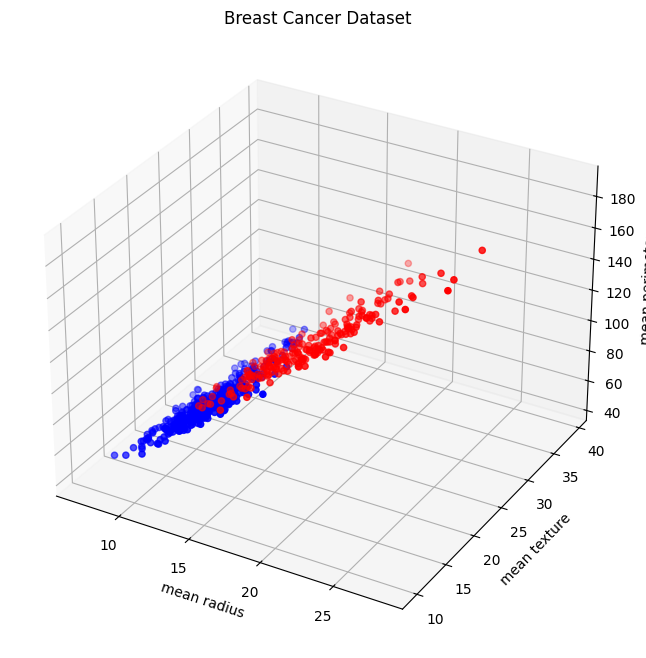

In [ ]:
X=[]

for target in range(2):
  X.append([[],[],[]])
  for i in range(len(cancer.data)):
    if cancer.target[i]==target:
      X[target][0].append(cancer.data[i][0])
      X[target][1].append(cancer.data[i][1])
      X[target][2].append(cancer.data[i][2])

colors=('r','b')
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1,projection='3d')
for target in range(2):
  ax.scatter(X[target][0],X[target][1],X[target][2],c=colors[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
ax.set_title("Breast Cancer Dataset")
plt.show()


/tmp/ipython-input-1159390929.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)


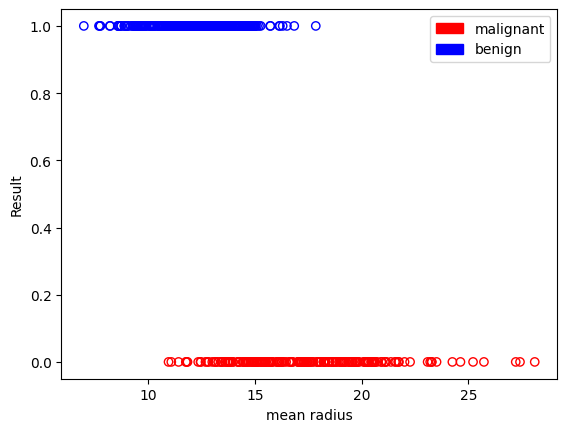

In [ ]:
x=cancer.data[:,0]
y=cancer.target

colors={0:'r',1:'b'}
plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)
plt.xlabel('mean radius')
plt.ylabel('Result')

red=mpatches.Patch(color='red',label='malignant')
blue=mpatches.Patch(color='blue',label='benign')
plt.legend(handles=[red,blue],loc=1)

In [ ]:
from sklearn import linear_model
log_regress=linear_model.LogisticRegression()
##train the model
log_regress.fit(X=np.array(x).reshape(len(x),1),y=y)

##peint trained model intercept
print(log_regress.intercept_)
##print trained model coefficient
print(log_regress.coef_)

[15.12718591]
[[-1.02519623]]


**Logistix Regression**
<br>
ln(p/1-p)=a +bx  

where p is probability of positive class \
      a=intercept\
                       b=coefficient

/tmp/ipython-input-3618896641.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)


Text(0, 0.5, 'Probability')

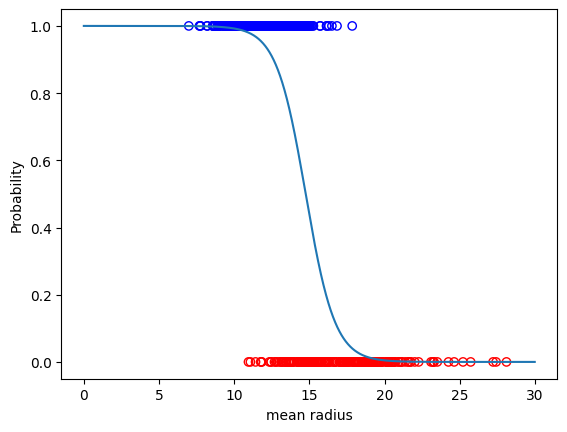

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-(log_regress.intercept_[0] + log_regress.coef_[0]*x)))

x1=np.arange(0,30,0.01)
y1=[sigmoid(n) for n in x1]

colors={0:'r',1:'b'}
plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)
plt.plot(x1,y1)
plt.xlabel('mean radius')
plt.ylabel('Probability')

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set,train_labels,test_labels=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=42,stratify=cancer.target)

In [ ]:
from sklearn import linear_model
x=train_set[:,0:30] #mean radius
y=train_labels

log_regress=linear_model.LogisticRegression()
##train the model
log_regress.fit(X=x,y=y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#get predicted probablity in dataframes
preds_prob=pd.DataFrame(log_regress.predict_proba(X=test_set))

#assign column names to prediction
preds_prob.columns=['benign','malignant']

#get the predicted class labels
preds=log_regress.predict(X=test_set)
preds_class=pd.DataFrame(preds)
preds_class.columns=["prediction"]

#actual diagnosis
original_result=pd.DataFrame(test_labels)
original_result.columns=["original"]

#merge the 3 dataframes in 1
result=pd.concat([preds_prob,preds_class,original_result],axis=1)
result.head()


,benign,malignant,prediction,original
0,1.000000,2.849586e-12,0,0
1,0.000229,9.997710e-01,1,1
2,0.794278,2.057221e-01,0,0
3,0.574295,4.257046e-01,0,1
4,1.000000,7.047966e-13,0,0


In [ ]:
print ("confusion_matrix")
pd.crosstab(result.original,result.prediction)


confusion_matrix


prediction,0,1
original,,
0,38,4
1,1,71


In [ ]:
from sklearn import metrics
print ("accuracy_score")

print(log_regress.score(X=test_set,y=test_labels))

accuracy_score
0.956140350877193


In [ ]:
print(metrics.confusion_matrix(y_true=test_labels,y_pred=preds))

[[38  4]
 [ 1 71]]


In [ ]:
print(metrics.classification_report(y_true=test_labels,y_pred=preds))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



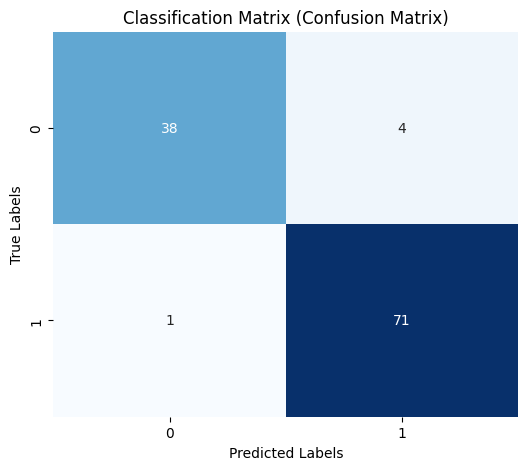

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import seaborn as sns

# Example: assuming test_labels and preds already defined
cm = confusion_matrix(test_labels, preds)
print(classification_report(test_labels, preds))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Classification Matrix (Confusion Matrix)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
